In [23]:
#import libraries
import pandas as pd
import numpy as np

In [24]:
#read data files
internet = pd.read_csv('internet.csv')
employ = pd.read_csv('employment_status.csv')
internet.head()

,Label (Grouping),District of Columbia!!Total!!Estimate,"Calvert County, Maryland!!Total!!Estimate","Charles County, Maryland!!Total!!Estimate","Frederick County, Maryland!!Total!!Estimate","Montgomery County, Maryland!!Total!!Estimate","Prince George's County, Maryland!!Total!!Estimate","Arlington County, Virginia!!Total!!Estimate","Fairfax County, Virginia!!Total!!Estimate","Fauquier County, Virginia!!Total!!Estimate","Loudoun County, Virginia!!Total!!Estimate","Prince William County, Virginia!!Total!!Estimate","Spotsylvania County, Virginia!!Total!!Estimate","Stafford County, Virginia!!Total!!Estimate"
0,Total households,"334,673","33,642","62,532","107,332","392,629","351,460","114,097","414,946","26,954","145,601","158,620","55,487","53,938"
1,TYPES OF COMPUTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Has one or more types of computing dev...,"322,682","32,824","61,162","104,713","385,442","344,313","112,689","409,441","25,916","144,330","155,897","54,620","53,299"
3,Desktop or laptop,"288,296","30,288","54,821","94,789","350,968","298,917","105,513","382,876","23,486","135,722","143,404","48,609","50,172"
4,Desktop or laptop with no othe...,"4,824",641,"1,244","2,275","6,982","9,065","1,768","6,393",252,"1,965","1,776","1,443","1,090"


In [25]:
def clean_all_numeric_columns(df):
    cleaned_df = df.copy()
    for column in cleaned_df.columns[1:]:
        cleaned_df[column] = pd.to_numeric(
            cleaned_df[column]
            .astype(str)
            .str.replace(',', '')  # Remove commas
            .str.extract(r'(\d+\.?\d*)')[0]
            .dropna(),    # Extract numeric part
            errors='coerce'                    # Set invalid values to NaN
        )
    return cleaned_df

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

employ_clean = clean_all_numeric_columns(employ)
internet_clean = clean_all_numeric_columns(internet)

internet_clean = internet_clean.rename(columns={'Label (Grouping)': 'Label'})
employ_clean = employ_clean.rename(columns={'Label (Grouping)': 'Label'})

employ_clean

,Label,District of Columbia!!Estimate,"Calvert County, Maryland!!Estimate","Charles County, Maryland!!Estimate","Frederick County, Maryland!!Estimate","Montgomery County, Maryland!!Estimate","Prince George's County, Maryland!!Estimate","Arlington County, Virginia!!Estimate","Fairfax County, Virginia!!Estimate","Fauquier County, Virginia!!Estimate","Loudoun County, Virginia!!Estimate","Prince William County, Virginia!!Estimate","Spotsylvania County, Virginia!!Estimate","Stafford County, Virginia!!Estimate"
0,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Population 16 years and over,564543.0,75683.0,136896.0,232205.0,848459.0,764861.0,196649.0,916511.0,59979.0,336068.0,378680.0,117792.0,128062.0
2,In labor force,410840.0,54286.0,96544.0,161197.0,594106.0,536620.0,153893.0,647217.0,40629.0,246726.0,272453.0,79725.0,90663.0
3,Civilian labor force,406660.0,53355.0,94054.0,159795.0,590482.0,532344.0,150647.0,635451.0,40629.0,245361.0,265189.0,78788.0,85546.0
4,Employed,385274.0,51821.0,88610.0,156782.0,567498.0,503937.0,145245.0,614947.0,39667.0,236508.0,253887.0,76957.0,83131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,18 years and over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,18 to 64 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,65 years and over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,People in families,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#change the column names to get rid of possible case-sensitivities and extra characters
internet_clean['Label'] = internet_clean['Label'].str.strip().str.lower()
employ_clean['Label'] = employ_clean['Label'].str.strip().str.lower()

#select rows being used for our graphs in the respective data sets
broadband_row = internet_clean[internet_clean['Label'] == 'broadband of any type']
employment_row = employ_clean[employ_clean['Label'] == 'employed'].head(1)
unemployment_row = employ_clean[employ_clean['Label'] == 'unemployed'].head(1)

#converting rows into long form and cleaning row names
broadband_long = broadband_row.melt(id_vars='Label', var_name='County', value_name='Households')
broadband_long = broadband_long[broadband_long['Label'] == 'broadband of any type'].drop(columns='Label')

employment_long = employment_row.melt(id_vars='Label', var_name='County', value_name='Households')
employment_long = employment_long[employment_long['Label'] == 'employed'].drop(columns='Label')

unemployment_long = unemployment_row.melt(id_vars='Label', var_name='County', value_name='Households')
unemployment_long = unemployment_long[unemployment_long['Label'] == 'unemployed'].drop(columns='Label')

broadband_long['County'] = broadband_long['County'].str.replace('!!Total!!Estimate', '', regex=False)
employment_long['County'] = employment_long['County'].str.replace('!!Estimate', '', regex=False)
unemployment_long['County'] = unemployment_long['County'].str.replace('!!Estimate', '', regex=False)


# reset index for cleaner output
broadband_long = broadband_long.reset_index(drop=True)
employment_long = employment_long.reset_index(drop=True)
unemployment_long = unemployment_long.reset_index(drop=True)

unemployment_long

,County,Households
0,District of Columbia,21386.0
1,"Calvert County, Maryland",1534.0
2,"Charles County, Maryland",5444.0
3,"Frederick County, Maryland",3013.0
4,"Montgomery County, Maryland",22984.0
5,"Prince George's County, Maryland",28407.0
6,"Arlington County, Virginia",5402.0
7,"Fairfax County, Virginia",20504.0
8,"Fauquier County, Virginia",962.0
9,"Loudoun County, Virginia",8853.0


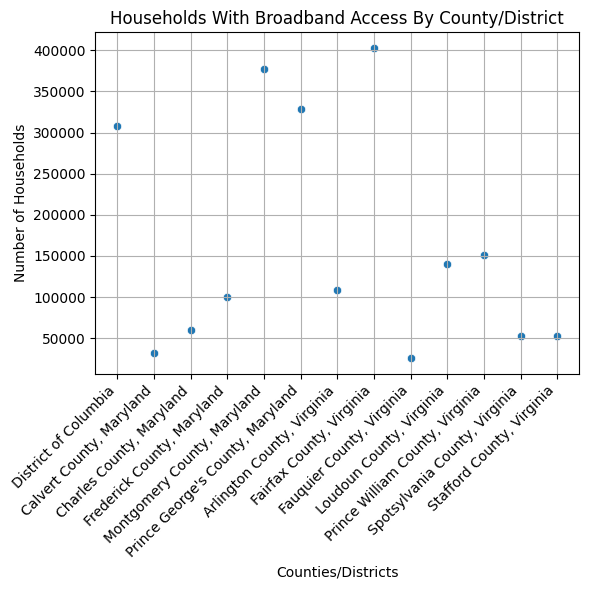

In [60]:
# Create scatter plot that displays households with broadband access
plt.figure(figsize=(6, 6))
sns.scatterplot(
    data= broadband_long,
    x='County',
    y='Households'
)
plt.title('Households With Broadband Access By County/District')
plt.xlabel('Counties/Districts')
plt.ylabel('Number of Households')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

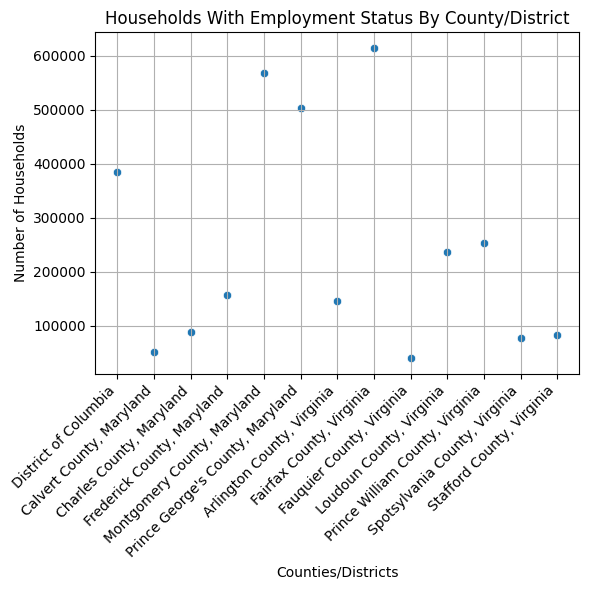

In [61]:
# Create scatter plot that compares relationship between unemployment rates and internet access
plt.figure(figsize=(6, 6))
sns.scatterplot(
    data=employment_long,
    x='County',
    y='Households'
)
plt.title('Households With Employment Status By County/District')
plt.xlabel('Counties/Districts')
plt.ylabel('Number of Households')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

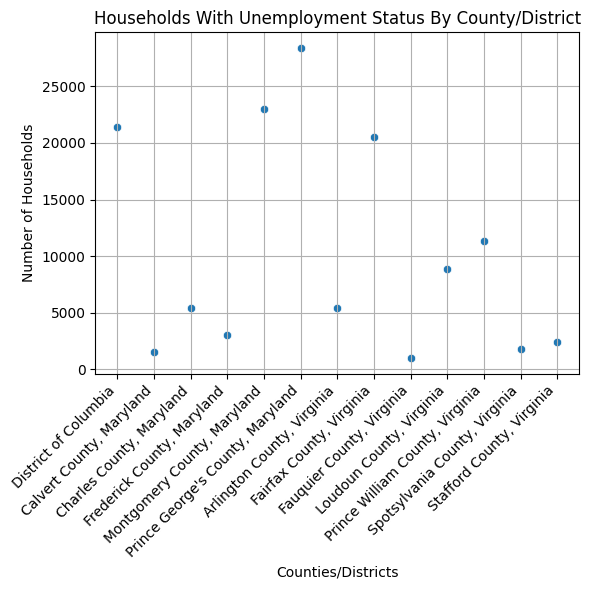

In [62]:
# Create scatter plot that compares relationship between unemployment rates and internet access
plt.figure(figsize=(6, 6))
sns.scatterplot(
    data=unemployment_long,
    x='County',
    y='Households'
)
plt.title('Households With Unemployment Status By County/District')
plt.xlabel('Counties/Districts')
plt.ylabel('Number of Households')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

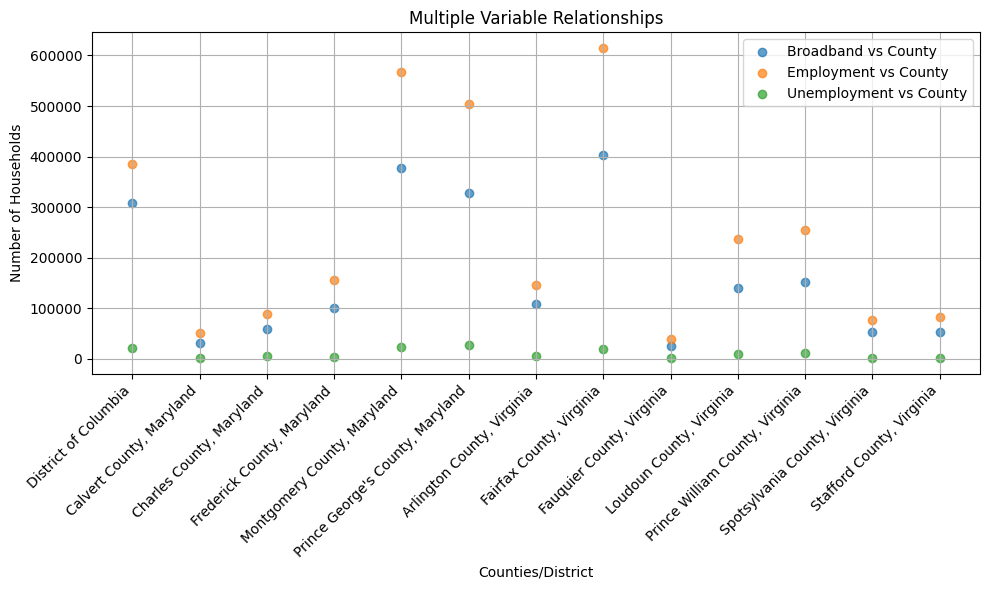

In [69]:
# create scatter plot that combines both previous variable comparisons, creating a relationship between vehicle vs. economic as well
plt.figure(figsize=(10, 6))

# Plot 1: Broadband
plt.scatter(
    combined['County'],
    combined['Broadband Households'],
    label='Broadband vs County',
    alpha=0.7
)

# Plot 2: Employment
plt.scatter(
    combined['County'],
    combined['Employment Households'],
    label='Employment vs County',
    alpha=0.7
)

# Plot 3: Unemployment
plt.scatter(
    combined['County'],
    combined['Unemployment Households'],
    label='Unemployment vs County',
    alpha=0.7
)

# Add labels and legend
plt.title("Multiple Variable Relationships")
plt.xlabel("Counties/District")
plt.ylabel("Number of Households")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [64]:
combined = broadband_long.merge(employment_long, on='County').merge(unemployment_long, on='County')

combined = combined.rename(columns={
    'Households_x': 'Broadband Households',
    'Households_y': 'Employment Households',
    'Households': 'Unemployment Households'
})

combined

,County,Broadband Households,Employment Households,Unemployment Households
0,District of Columbia,308346.0,385274.0,21386.0
1,"Calvert County, Maryland",32006.0,51821.0,1534.0
2,"Charles County, Maryland",59756.0,88610.0,5444.0
3,"Frederick County, Maryland",100509.0,156782.0,3013.0
4,"Montgomery County, Maryland",377101.0,567498.0,22984.0
5,"Prince George's County, Maryland",328291.0,503937.0,28407.0
6,"Arlington County, Virginia",108274.0,145245.0,5402.0
7,"Fairfax County, Virginia",402954.0,614947.0,20504.0
8,"Fauquier County, Virginia",25441.0,39667.0,962.0
9,"Loudoun County, Virginia",140657.0,236508.0,8853.0


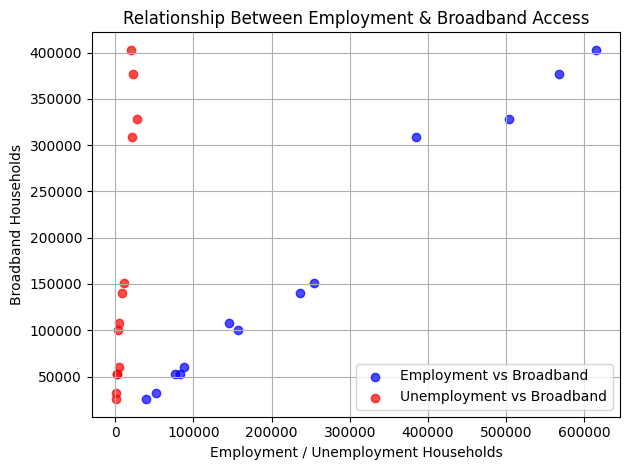

In [70]:
# Employed vs Broadband
plt.scatter(
    combined['Employment Households'],
    combined['Broadband Households'],
    label='Employment vs Broadband',
    color='blue',
    alpha=0.7
)

# Unemployed vs Broadband
plt.scatter(
    combined['Unemployment Households'],
    combined['Broadband Households'],
    label='Unemployment vs Broadband',
    color='red',
    alpha=0.7
)

plt.xlabel("Employment / Unemployment Households")
plt.ylabel("Broadband Households")
plt.title("Relationship Between Employment & Broadband Access")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
#
employment_corr = combined['Employment Households'].corr(combined['Broadband Households'])
unemployment_corr = combined['Unemployment Households'].corr(combined['Broadband Households'])

print(f"Correlation (Employment vs Broadband): {employment_corr:.2f}")
print(f"Correlation (Unemployment vs Broadband): {unemployment_corr:.2f}")

Correlation (Employment vs Broadband): 0.99
Correlation (Unemployment vs Broadband): 0.95


In [73]:
from sklearn.linear_model import LinearRegression

# Reshape inputs
X = combined[['Unemployment Households']] 
y = combined['Broadband Households']      

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R² Score: {r_squared:.2f}")

Slope: 13.64
Intercept: 24053.27
R² Score: 0.90
